# Enhancing E-Commerce Strategies Through Customer Behavior Analysis
<span style="font-size:20px;"> - Amisha Kelkar, Arundhati (Ari) Kolahal, Chaitali Deshmukh, Neha Shastri

## Customer Segmentation

### Importing Relevant Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.font_manager as fm

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Dataset

1. Dataset before filtering anomalies.

In [ ]:
users = pd.read_parquet('users_w_capped_probabilities.parquet')

In [ ]:
users = users.drop(['avg_time_addtocart_to_transaction', 'avg_time_view_to_addtocart', 'avg_time_between_transactions', 'avg_items_per_transaction'], axis = 1)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407580 entries, 0 to 1407579
Data columns (total 8 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   visitorid                      1407580 non-null  int64  
 1   total_addtocart                1407580 non-null  int64  
 2   total_transaction              1407580 non-null  int64  
 3   total_view                     1407580 non-null  int64  
 4   unique_items                   1407580 non-null  int64  
 5   avg_interactions_per_week      1407580 non-null  float64
 6   p_addtocart_given_view         1407580 non-null  float64
 7   p_transaction_given_addtocart  1407580 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 85.9 MB


* Dataset after filtering anolmalies.

In [ ]:
clean_users = pd.read_parquet("users_without_outliers.parquet")
clean_users.head(3)

,visitorid,total_addtocart,total_transaction,total_view,unique_items,avg_interactions_per_week,p_addtocart_given_view,p_transaction_given_addtocart,pca_outlier,iso_pca_outlier,anomaly
0,0,0,0,3,3,3.0,0.0,0.0,0,0,0
1,1,0,0,1,1,1.0,0.0,0.0,0,0,0
2,2,0,0,8,4,8.0,0.0,0.0,0,1,0


In [ ]:
clean_users.isna().sum()

visitorid                        0
total_addtocart                  0
total_transaction                0
total_view                       0
unique_items                     0
avg_interactions_per_week        0
p_addtocart_given_view           0
p_transaction_given_addtocart    0
pca_outlier                      0
iso_pca_outlier                  0
anomaly                          0
dtype: int64

### Without Anomaly Detection
* Performed clustering to get customer segmentation based on the user behavioural patterns without removing the anomalies.

* Scaling the data for better model performance

In [ ]:
scaler = StandardScaler()
normalized_users = scaler.fit_transform(users)
normalized_users_df = pd.DataFrame(normalized_users, columns=users.columns.tolist())

* Changed the font style tsince the default font style resulted in error while executing MiniBatchKMeans.

In [ ]:
# List all available font families
font_paths = fm.findSystemFonts()
font_names = [fm.FontProperties(fname=path).get_name() for path in font_paths]

# Print all the font names
for font in font_names:
    print(font)


Latin Modern Roman
Latin Modern Sans
DejaVu Serif
Latin Modern Sans Quotation
Lato
Latin Modern Mono Prop Light
Latin Modern Roman
Lato
Latin Modern Roman Slanted
Lato
Latin Modern Mono
Latin Modern Mono Light
Latin Modern Roman Slanted
Latin Modern Mono
Lato
Latin Modern Roman
Latin Modern Mono Prop Light
Lato
Latin Modern Sans
Latin Modern Sans Quotation
Latin Modern Roman
Latin Modern Mono Prop Light
Lato
Latin Modern Roman
Latin Modern Sans
Latin Modern Sans
Latin Modern Roman
Latin Modern Roman Slanted
Latin Modern Sans
Latin Modern Roman Dunhill
Latin Modern Roman
Latin Modern Roman
Latin Modern Mono Prop
Latin Modern Roman Slanted
Latin Modern Mono Light
Latin Modern Mono Light Cond
Latin Modern Roman Caps
Latin Modern Math
Latin Modern Roman
Lato
Lato
Latin Modern Roman Demi
Lato
Latin Modern Roman Slanted
Latin Modern Mono
Latin Modern Roman
Lato
Latin Modern Mono Slanted
Latin Modern Roman Caps
Latin Modern Roman
DejaVu Sans Mono
Latin Modern Mono Caps
Lato
Latin Modern Sans


In [ ]:
plt.rcParams['font.family'] = 'Latin Modern Roman Demi'

* Initialized MiniBatchKMeans to find optimal number of clusters.

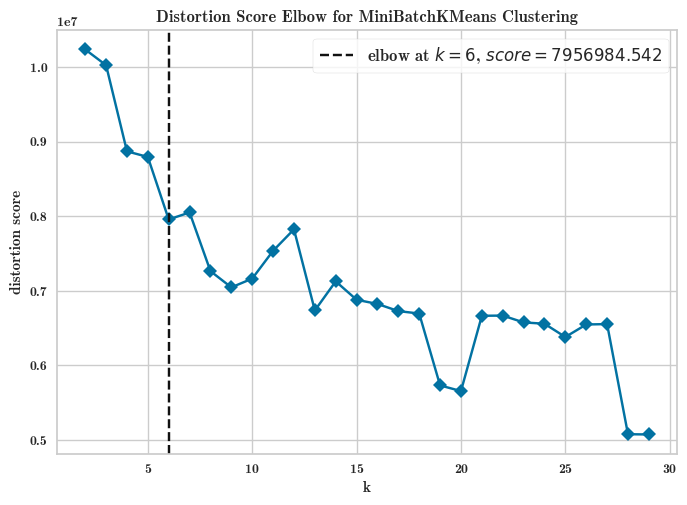

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the MiniBatchKMeans model
mbkmeans = MiniBatchKMeans(random_state=42)

# Initialize the KElbowVisualizer with the MiniBatchKMeans model
visualizer = KElbowVisualizer(mbkmeans, k=(2, 30), metric="distortion", timings=False, random_state=42)

# Fit the visualizer to your data
visualizer.fit(normalized_users)

# Show the plot
visualizer.show()


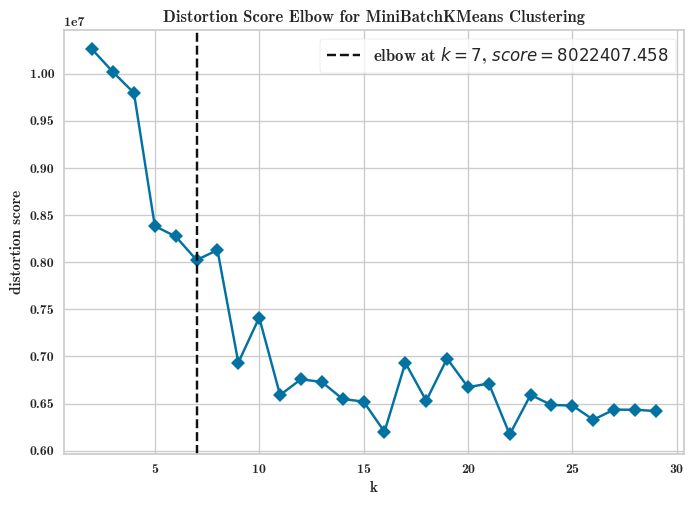

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the MiniBatchKMeans model
mbkmeans = MiniBatchKMeans(random_state=67)

# Initialize the KElbowVisualizer with the MiniBatchKMeans model
visualizer = KElbowVisualizer(mbkmeans, k=(2, 30), metric="distortion", timings=False, random_state=67)

# Fit the visualizer to your data
visualizer.fit(normalized_users)  # Replace `normalized_users` with your dataset

# Show the plot
visualizer.show()


* To stabilize results for number of clusters, re-ran the model several times with varied values of k and select the optimal value for number of clusters using the elbow method.
* Ran MiniBatchKMeans for improving stability multiple times with different initializations and choosing the result with the best inertia (or another evaluation metric).
* By taking the minimum inertia, effectively led to selecting the initialization that leads to the best possible clustering result in terms of compactness and cohesion.

In [ ]:
# List to store the minimum inertia values for each k
inertia_list = []

# List of k values (clusters) to test
k_values = range(2, 30)

# For each k, run MiniBatchKMeans multiple times and store the best inertia
for k in k_values:
    best_inertia = np.inf  # Start with a high inertia value
    for _ in range(10):  # Run 10 times to get multiple initializations
        mbkmeans = MiniBatchKMeans(n_clusters=k, n_init=1, random_state=None)
        mbkmeans.fit(normalized_users)  # Fit the model to the data
        inertia = mbkmeans.inertia_  # Get the inertia for this run
        best_inertia = min(best_inertia, inertia)  # Store the best inertia value
    inertia_list.append(best_inertia)  # Append the best inertia for this k



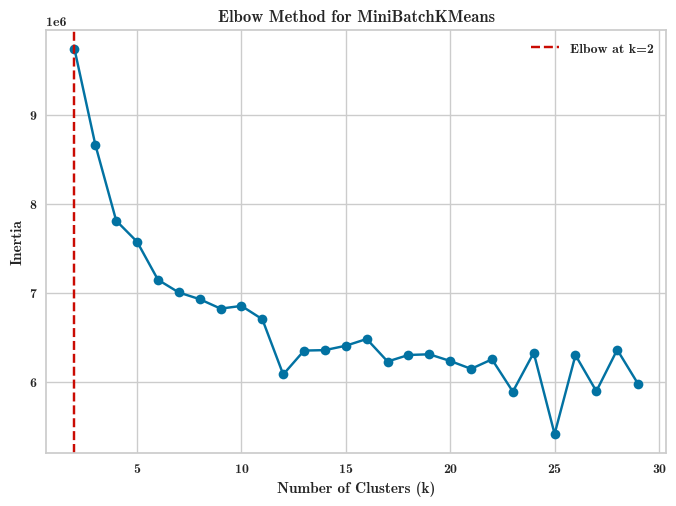

In [ ]:
# Now let's plot the elbow curve manually
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for MiniBatchKMeans')

diff = np.diff(inertia_list)
elbow_index = np.argmax(diff < 0.01)  # Look for where the change becomes small
elbow_value = inertia_list[elbow_index]

# Plot vertical line at elbow (at k=elbow_index)
plt.axvline(x=k_values[elbow_index], color='r', linestyle='--', label=f'Elbow at k={k_values[elbow_index]}')

# Display the plot
plt.legend()
plt.show()


* Implementing clustering using MiniBatchKMeans

In [ ]:
# Set the number of clusters (k) based on the elbow method
k = 2  # From your elbow method result

# Run MiniBatchKMeans 25 times and find the best clustering result
best_inertia = np.inf  # Start with a high inertia value
best_kmeans = None  # To store the best KMeans model
best_labels = None  # To store the best cluster labels

for _ in range(25):  # Run 25 times with different initializations
    mbkmeans = MiniBatchKMeans(n_clusters=k, n_init=1, random_state=None)
    mbkmeans.fit(normalized_users)  # Fit the model to the data

    inertia = mbkmeans.inertia_  # Get the inertia for this run

    # If this model gives a lower inertia, save it as the best
    if inertia < best_inertia:
        best_inertia = inertia
        best_kmeans = mbkmeans
        best_labels = mbkmeans.labels_

# Assign the cluster labels to the users DataFrame
users['kmeans_cluster'] = best_labels  # This will add a new column for cluster labels

In [ ]:
print(f'Best Inertia: {best_inertia}')

Best Inertia: 9760531.69849083


In [ ]:
# Display the number of samples in each cluster
cluster_counts = users['kmeans_cluster'].value_counts()

print(cluster_counts)

kmeans_cluster
0    1382358
1      25222
Name: count, dtype: int64


In [ ]:
users.to_parquet('users_cust_seg.parquet')

* Summarized the clusters formed

In [ ]:
cluster_1 = users[users['kmeans_cluster'] == 1]
cluster_0 = users[users['kmeans_cluster'] == 0]

users_columns = [
    'total_addtocart', 'total_transaction', 'total_view', 'unique_items',  'avg_interactions_per_week',
    'p_addtocart_given_view', 'p_transaction_given_addtocart'
]

cluster_1_mean = cluster_1[users_columns].mean()
cluster_0_mean = cluster_0[users_columns].mean()

comparison_df_clusters = pd.DataFrame({
    'Cluster 0': cluster_0_mean,
    'Cluster 1': cluster_1_mean
})

print("Cluster 0 vs Cluster 1 Comparison")
print(comparison_df_clusters)

Cluster 0 vs Cluster 1 Comparison
                               Cluster 0  Cluster 1
total_addtocart                 0.012578   2.059512
total_transaction               0.002498   0.753469
total_view                      1.784418   7.834708
unique_items                    1.450199   5.569939
avg_interactions_per_week       1.549662   5.680675
p_addtocart_given_view          0.001584   0.720621
p_transaction_given_addtocart   0.000429   0.255531


**Cluster Summary**<br>
Cluster 0 represents users with low engagement, showing minimal product views, add-to-cart actions, and transactions. In contrast, Cluster 1 consists of highly engaged users, with significantly more views, unique items, and purchases. The probability of converting a view to a transaction is substantially higher in Cluster 1, suggesting that these users are more likely to make a purchase. This segmentation highlights the need for targeted marketing strategies, where Cluster 1 users could be incentivized with loyalty programs, while Cluster 0 users may require more personalized recommendations or promotions to increase engagement.

### With Anomaly Detection
* Performed clustering to get customer segmentation based on the user behavioural patterns after removing the anomalies.

* Scaling the data for better model performance

In [ ]:
scaler = StandardScaler()
normalized_users = scaler.fit_transform(clean_users)
normalized_users_df = pd.DataFrame(normalized_users, columns=clean_users.columns.tolist())

* Initialized MiniBatchKMeans to find optimal number of clusters.

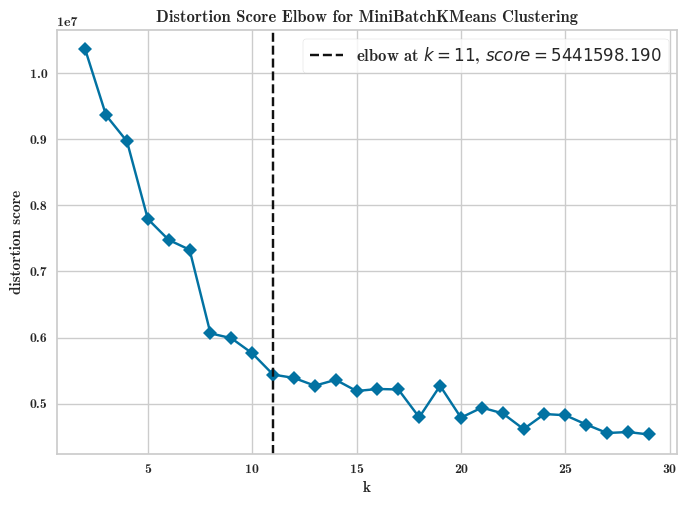

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the MiniBatchKMeans model
mbkmeans = MiniBatchKMeans(random_state=42)

# Initialize the KElbowVisualizer with the MiniBatchKMeans model
visualizer = KElbowVisualizer(mbkmeans, k=(2, 30), metric="distortion", timings=False, random_state=42)

# Fit the visualizer to your data
visualizer.fit(normalized_users)  # Replace `normalized_users` with your dataset

# Show the plot
visualizer.show()


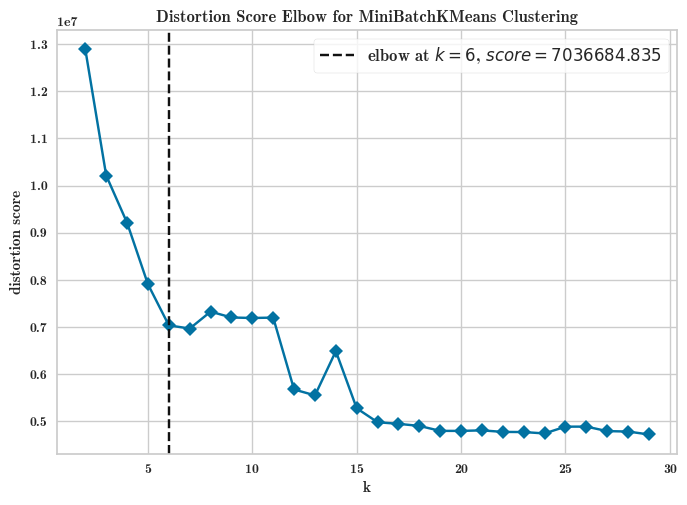

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the MiniBatchKMeans model
mbkmeans = MiniBatchKMeans(random_state=67)

# Initialize the KElbowVisualizer with the MiniBatchKMeans model
visualizer = KElbowVisualizer(mbkmeans, k=(2, 30), metric="distortion", timings=False, random_state=67)

# Fit the visualizer to your data
visualizer.fit(normalized_users)  # Replace `normalized_users` with your dataset

# Show the plot
visualizer.show()


* To stabilize results for number of clusters, re-ran the model several times with varied values of k and select the optimal value for number of clusters using the elbow method.
* Ran MiniBatchKMeans for improving stability multiple times with different initializations and choosing the result with the best inertia (or another evaluation metric).
* By taking the minimum inertia, effectively led to selecting the initialization that leads to the best possible clustering result in terms of compactness and cohesion.

In [ ]:
# List to store the minimum inertia values for each k
inertia_list = []

# List of k values (clusters) to test
k_values = range(2, 30)

# For each k, run MiniBatchKMeans multiple times and store the best inertia
for k in k_values:
    best_inertia = np.inf  # Start with a high inertia value
    for _ in range(10):  # Run 10 times to get multiple initializations
        mbkmeans = MiniBatchKMeans(n_clusters=k, n_init=1, random_state=None)
        mbkmeans.fit(normalized_users)  # Fit the model to the data
        inertia = mbkmeans.inertia_  # Get the inertia for this run
        best_inertia = min(best_inertia, inertia)  # Store the best inertia value
    inertia_list.append(best_inertia)  # Append the best inertia for this k



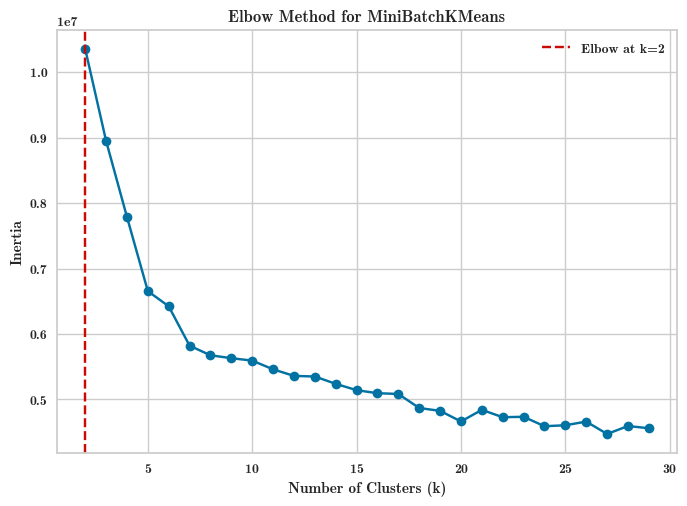

In [ ]:
# Now let's plot the elbow curve manually
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for MiniBatchKMeans')

diff = np.diff(inertia_list)
elbow_index = np.argmax(diff < 0.01)  # Look for where the change becomes small
elbow_value = inertia_list[elbow_index]

# Plot vertical line at elbow (at k=elbow_index)
plt.axvline(x=k_values[elbow_index], color='r', linestyle='--', label=f'Elbow at k={k_values[elbow_index]}')

# Display the plot
plt.legend()
plt.show()


* Implementing clustering using MiniBatchKMeans

In [ ]:
# Set the number of clusters (k) based on the elbow method
k = 2  # From your elbow method result

# Run MiniBatchKMeans 25 times and find the best clustering result
best_inertia = np.inf  # Start with a high inertia value
best_kmeans = None  # To store the best KMeans model
best_labels = None  # To store the best cluster labels

for _ in range(25):  # Run 25 times with different initializations
    mbkmeans = MiniBatchKMeans(n_clusters=k, n_init=1, random_state=None)
    mbkmeans.fit(normalized_users)  # Fit the model to the data

    inertia = mbkmeans.inertia_  # Get the inertia for this run

    # If this model gives a lower inertia, save it as the best
    if inertia < best_inertia:
        best_inertia = inertia
        best_kmeans = mbkmeans
        best_labels = mbkmeans.labels_

# Assign the cluster labels to the users DataFrame
clean_users['kmeans_cluster'] = best_labels  # This will add a new column for cluster labels

In [ ]:
print(f'Best Inertia: {best_inertia}')

Best Inertia: 10353896.278650114


In [ ]:
# Display the number of samples in each cluster
cluster_counts = clean_users['kmeans_cluster'].value_counts()

print(cluster_counts)

kmeans_cluster
1    1337201
0      63482
Name: count, dtype: int64


In [ ]:
clean_users.to_parquet('users_cust_seg_wo_outliers.parquet')

* Summarized the clusters formed

In [ ]:
cluster_1 = clean_users[clean_users['kmeans_cluster'] == 1]
cluster_0 = clean_users[clean_users['kmeans_cluster'] == 0]

users_columns = [
    'total_addtocart', 'total_transaction', 'total_view', 'unique_items',  'avg_interactions_per_week',
    'p_addtocart_given_view', 'p_transaction_given_addtocart'

]

cluster_1_mean = cluster_1[users_columns].mean()
cluster_0_mean = cluster_0[users_columns].mean()

comparison_df_clusters = pd.DataFrame({
    'Cluster 0': cluster_0_mean,
    'Cluster 1': cluster_1_mean
})

print("Cluster 0 vs Cluster 1 Comparison")
print(comparison_df_clusters)

Cluster 0 vs Cluster 1 Comparison
                               Cluster 0  Cluster 1
total_addtocart                 0.790870   0.000000
total_transaction               0.218298   0.000000
total_view                      6.826723   1.447179
unique_items                    4.670411   1.263614
avg_interactions_per_week       5.968280   1.332878
p_addtocart_given_view          0.312091   0.000000
p_transaction_given_addtocart   0.106677   0.000000


**Cluster Analysis Summary**<br>
Cluster 0 represents highly engaged users, characterized by a higher number of product views, add-to-cart actions, and transactions, indicating strong purchase intent. In contrast, Cluster 1 consists of low-engagement users, who have minimal interactions, with no add-to-cart actions or transactions. The probability of conversion (view-to-add-to-cart and add-to-cart-to-transaction) is significantly higher in Cluster 0, suggesting that these users are more responsive to purchasing stimuli. These insights can help tailor marketing efforts, such as retargeting campaigns for Cluster 1 users to encourage engagement, while offering incentives or promotions to Cluster 0 users to boost repeat purchases.